# Support Vector Machines

In [26]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn import datasets, svm 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [27]:
mushrooms=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

In [28]:
headers=[x for x in range(0,23)]
mushrooms.columns=headers
print(len(mushrooms))

8123


In [29]:
mushrooms.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
2636,e,x,f,g,t,n,f,c,b,n,...,s,p,g,p,w,o,p,n,v,d
6372,p,f,s,n,f,f,f,c,n,b,...,k,p,p,p,w,o,e,w,v,d
4273,p,f,y,g,f,f,f,c,b,p,...,k,p,n,p,w,o,l,h,v,d


In [31]:
encoder=LabelEncoder()
for i in mushrooms:
    mushrooms[i]=encoder.fit_transform(mushrooms[i])


In [32]:
mushrooms.sample()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
5661,1,2,3,9,0,2,1,0,0,2,...,1,6,4,0,2,1,2,1,5,1


In [33]:
features=mushrooms.columns[:-1]
target=mushrooms.columns[-1]

Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

In [34]:
features

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21],
           dtype='int64')

In [35]:
target

22

In [36]:
train,test=train_test_split(mushrooms,test_size=0.2)

In [37]:
len(train)

6498

In [38]:
len(test)

1625

In [39]:
kernels = ('linear','poly','rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(train[features], train[target])
    predicted=model.predict(test[features])
    acc = accuracy_score(test[target],predicted)*100
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc, kernel))

64.0 % accuracy obtained with kernel = linear
56.43076923076923 % accuracy obtained with kernel = poly
59.93846153846154 % accuracy obtained with kernel = rbf


In [40]:
features=[21,22]
# the features are Horsepower and acceleration 

In [41]:
deg=5

In [42]:
svc = svm.SVC(kernel='linear').fit(train[features],train[target] )
rbf_svc = svm.SVC(kernel='rbf', gamma=0.8).fit(train[features], train[target])
poly_svc = svm.SVC(kernel='poly', degree=deg).fit(train[features], train[target])

In [43]:
#Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = mushrooms[features[0]].min() - 1, mushrooms[features[0]].max() + 1
y_min, y_max = mushrooms[features[1]].min() - 1, mushrooms[features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

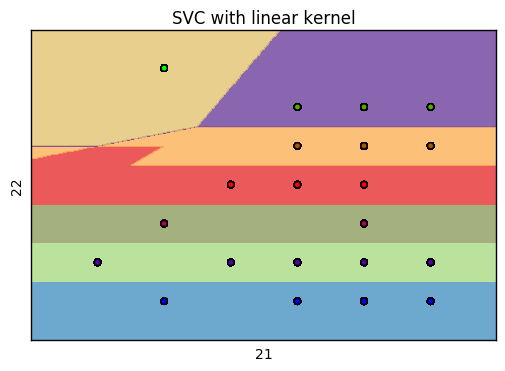

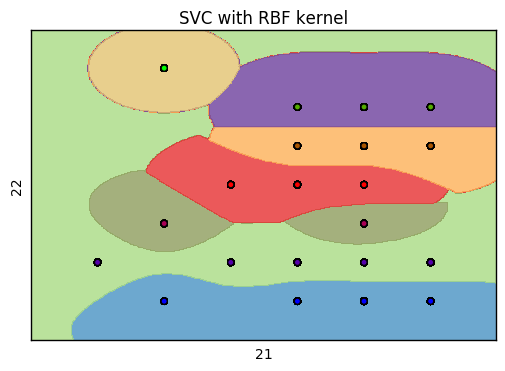

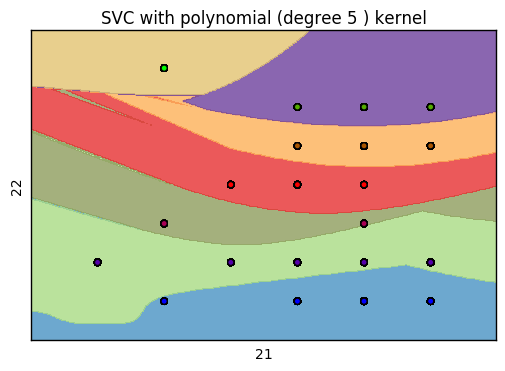

In [44]:
#Define title for the plots
string='SVC with polynomial (degree '+str(deg) +' ) kernel'
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
           string]


for i, model in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(i)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel returns continuous flaten array

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    #cmap stands for color map you can also make it to None

    
    
    # Plot also the training points
    plt.scatter(mushrooms[features[0]], mushrooms[features[1]], c=mushrooms[target], cmap=plt.cm.brg)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [46]:
#Checking the support vectors of the linear kernel
print("The support vectors for linear kernel are:\n", svc.support_vectors_)
print()
print()

#Checking the support vectors of the rbf kernel
print("The support vectors for radial basis function are:\n", rbf_svc.support_vectors_)
print()
print()

#Checking the support vectors of the polynomial kernel (for example)
print("The support vectors for polynomial kernel are:\n", poly_svc.support_vectors_)


The support vectors for linear kernel are:
 [[ 1.  0.]
 [ 4.  0.]
 [ 4.  0.]
 [ 4.  1.]
 [ 4.  1.]
 [ 0.  1.]
 [ 5.  1.]
 [ 1.  2.]
 [ 4.  2.]
 [ 4.  2.]
 [ 4.  3.]
 [ 4.  3.]
 [ 2.  3.]
 [ 3.  3.]
 [ 3.  3.]
 [ 3.  4.]
 [ 3.  4.]
 [ 5.  4.]
 [ 4.  4.]
 [ 3.  5.]
 [ 4.  5.]
 [ 5.  5.]
 [ 1.  6.]]


The support vectors for radial basis function are:
 [[ 1.  0.]
 [ 1.  0.]
 [ 3.  0.]
 [ 5.  0.]
 [ 5.  0.]
 [ 3.  0.]
 [ 4.  0.]
 [ 5.  1.]
 [ 2.  1.]
 [ 0.  1.]
 [ 4.  1.]
 [ 4.  1.]
 [ 0.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 5.  1.]
 [ 1.  2.]
 [ 1.  2.]
 [ 4.  2.]
 [ 4.  2.]
 [ 4.  2.]
 [ 4.  3.]
 [ 4.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 3.  3.]
 [ 3.  4.]
 [ 5.  4.]
 [ 3.  4.]
 [ 5.  4.]
 [ 4.  4.]
 [ 5.  5.]
 [ 3.  5.]
 [ 3.  5.]
 [ 4.  5.]
 [ 5.  5.]
 [ 1.  6.]
 [ 1.  6.]]


The support vectors for polynomial kernel are:
 [[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 